In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Data/Stock_Price_Prediction/Stock_Price_data_set.xlsx')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100.0
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800.0
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500.0
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700.0
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900.0


In [ ]:
df.shape

(1009, 7)

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 55.3 KB


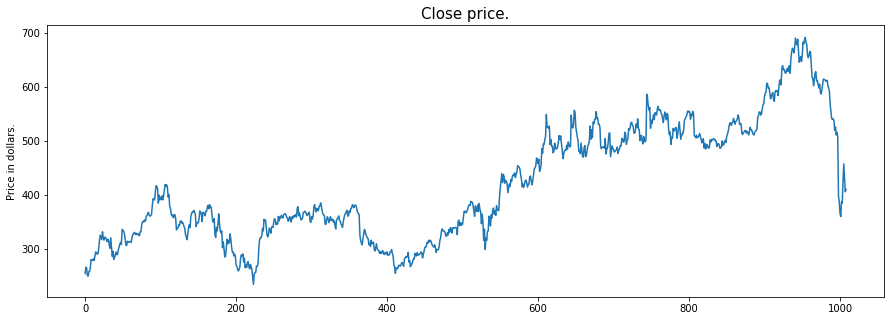

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100.0
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800.0
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500.0
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700.0
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900.0


If we observe carefully we can see that the data in the ‘Close’ column and that available in the ‘Adj Close’ column is the same let’s check whether this is the case with each row or not.

In [ ]:
df[df['Close'] == df['Adj Close']].shape

(1009, 7)

From here we can conclude that all the rows of columns ‘Close’ and ‘Adj Close’ have the same data. So, having redundant data in the dataset is not going to help so, we’ll drop this column before further analysis.

In [ ]:
df = df.drop(['Adj Close'], axis=1)

In [ ]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

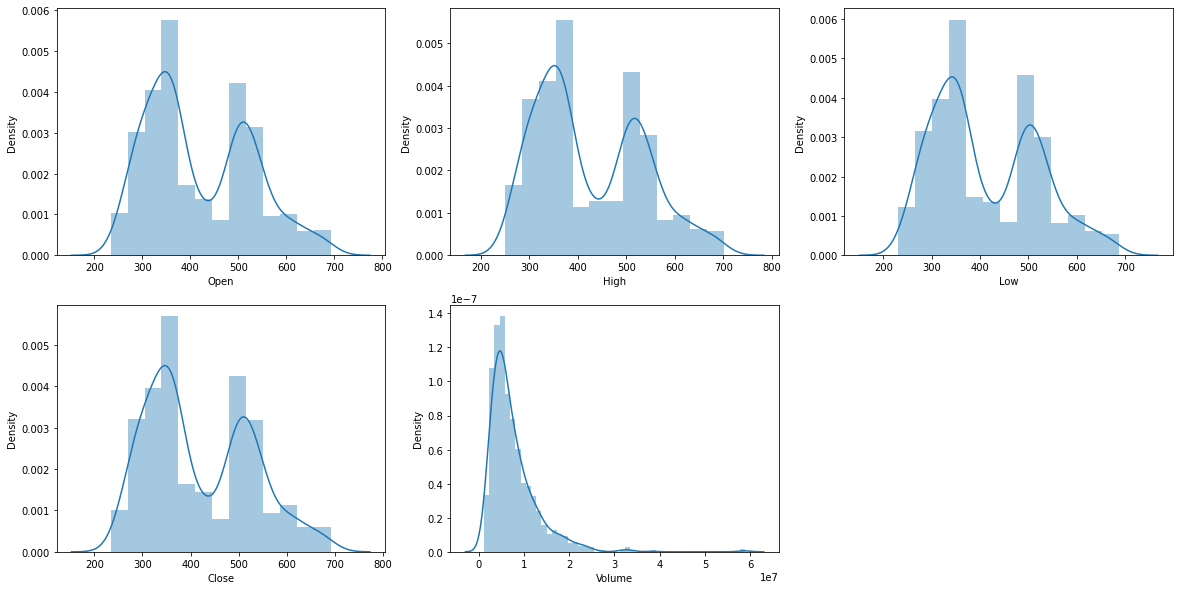

In [ ]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

we can see two peaks which means the data has varied significantly in two regions. And the Volume data is left-skewed.

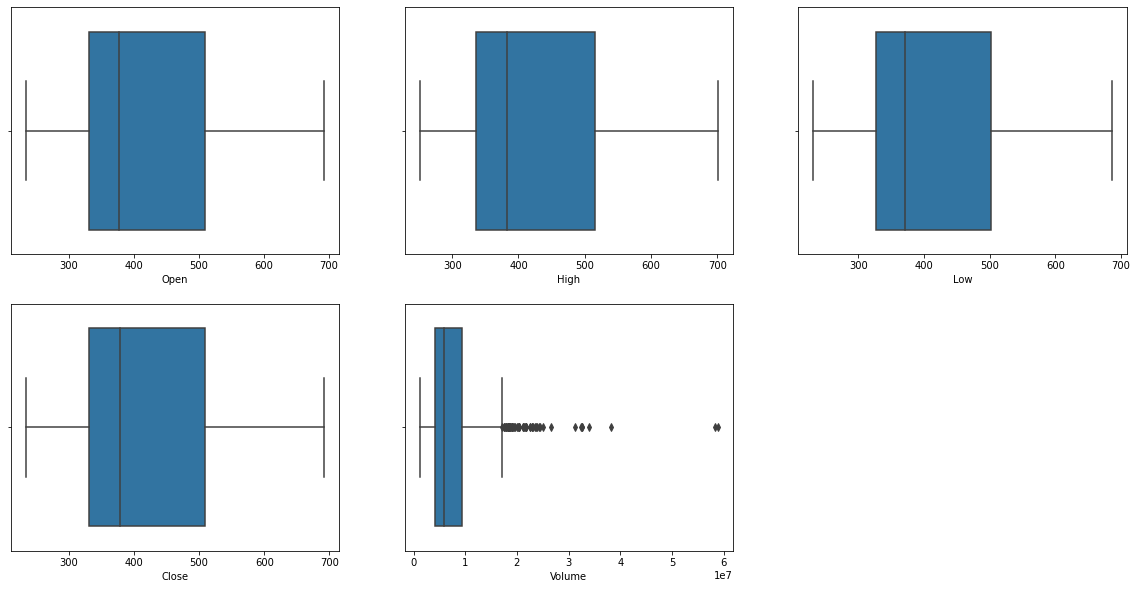

In [ ]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

we can conclude that only volume data contains outliers in it but the data in the rest of the columns are free from any outlier.we can conclude that only volume data contains outliers in it but the data in the rest of the columns are free from any outlier.

In [ ]:
df['Date'] = df['Date'].astype(str)
splitted = df['Date'].str.split('-', expand=True)
df['day'] = splitted[2].astype('int')
df['month'] = splitted[1].astype('int')
df['year'] = splitted[0].astype('int')

In [ ]:
splitted = df['Date'].str.split('-', expand=True)
df['day'] = splitted[2].astype('int')
df['month'] = splitted[1].astype('int')
df['year'] = splitted[0].astype('int')


df.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100.0,5,2,2018
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800.0,6,2,2018
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500.0,7,2,2018
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700.0,8,2,2018
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900.0,9,2,2018


### Now we have three more columns namely ‘day’, ‘month’ and ‘year’ all these three have been derived from the ‘Date’ column which was initially provided in the data.

In [ ]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100.0,5,2,2018,0
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800.0,6,2,2018,0
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500.0,7,2,2018,0
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700.0,8,2,2018,0
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900.0,9,2,2018,0


A quarter is defined as a group of three months. Every company prepares its quarterly results and publishes them publicly so, that people can analyze the company’s performance. These quarterly results affect the stock prices heavily which is why we have added this feature because this can be a helpful feature for the learning model.

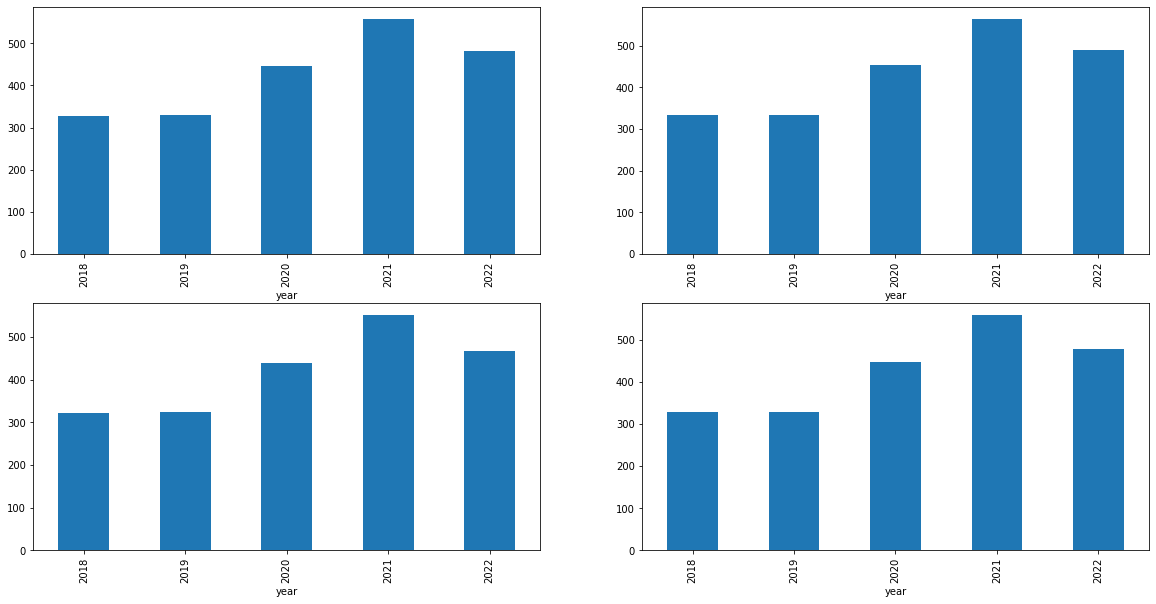

In [ ]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [ ]:
df.groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,418.681368,424.889821,412.112068,418.699791,7.951664e+06,15.715774,6.087798,2019.622024
1,419.814037,426.179910,412.896440,419.600831,6.810988e+06,15.721068,7.442136,2019.543027


In [ ]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

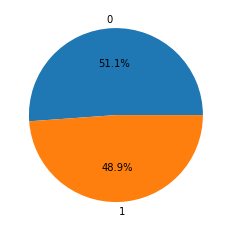

In [ ]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

#### When we add features to our dataset we have to ensure that there are no highly correlated features as they do not help in the learning process of the algorithm.

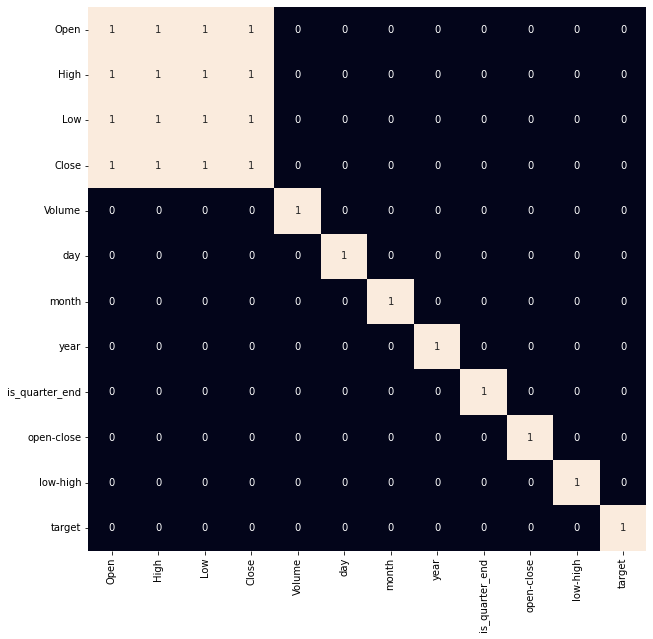

In [ ]:
plt.figure(figsize=(10, 10))
 
# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

From the above heatmap, we can say that there is a high correlation between OHLC that is pretty obvious, and the added features are not highly correlated with each other or previously provided features which means that we are good to go and build our model.

In [ ]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(908, 3) (101, 3)


After selecting the features to train the model on we should normalize the data because normalized data leads to stable and fast training of the model. After that whole data has been split into two parts with a 90/10 ratio so, that we can evaluate the performance of our model on unseen data.

In [ ]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]
 
for i in range(3):
  models[i].fit(X_train, Y_train)
 
  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5406138368447911
Validation Accuracy :  0.582598235765838

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5325945906539331
Validation Accuracy :  0.4947874899759423

XGBClassifier() : 
Training Accuracy :  0.7993268693348886
Validation Accuracy :  0.60084202085004



Among the three models, we have trained XGBClassifier has the highest performance but it is pruned to overfitting as the difference between the training and the testing accuracy is high. But in the case of the Logistic Regression, this is not the case.

Now let’s plot a confusion matrix for the testing data.

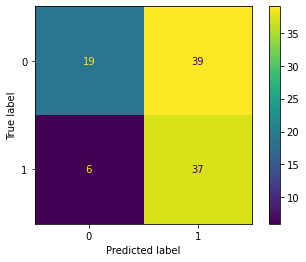

In [ ]:
metrics.plot_confusion_matrix(models[0], X_valid, Y_valid)
plt.show()